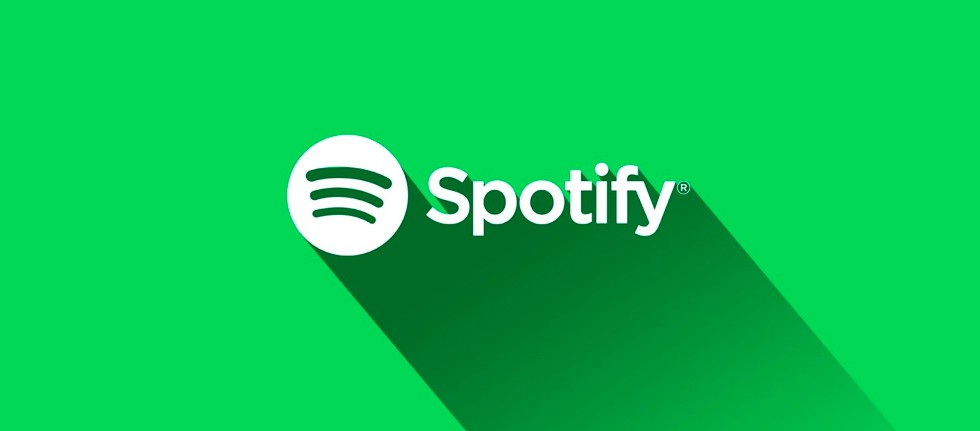

# <font color=gree> Extração de Álbuns, Faixa e Features de Artistas no Spotify

#### A partir da extração de dados de alguns artistas específicos diretamente do Spotify, algumas inferências serão realizadas de acordo com a característica (FEATURES) contida em cada música desses artistas.

#### Dados como popularidade por faixa demonstram quais são as músicas mais escutadas, proporcionando assim a criação de esquemas visuais gráficos por artista.

#### Essa API específica das Features de faixas musicais, disponibiliza 15 diferentes atributos por valore (faixa musical), e para maior compreenção do projeto desenvolvido, esses atributos estão explicitados abaixo.

### <font color = gree> DESCRIÇÃO DAS SIGLAS DE INFORMAÇÕES E FEATURES DAS FAIXAS.

#### ALBUM: Nome do álbum do artista.

#### TRACK_NUMBER: Número da faixa do álbum correspondente.

#### ID: Identificação da música no Spotify.

#### NAME: Nome na faixa.

#### URI: Endereço WEB da faixa.

#### ACOUSTICNESS: Este valor descreve a quão acústica é uma música. Uma pontuação de 1,0 significa que é mais provável que a música seja acústica.

#### DANCEABILITY: “A capacidade de dança descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é mais dançante”.

#### ENERGY: “Representa uma medida perceptual de intensidade e atividade. Normalmente, faixas energéticas parecem rápidas, altas e barulhentas”.

#### INSTRUMENTALNESS: Este valor representa o número de vocais da música. Quanto mais próximo estiver de 1.0, mais instrumental será a música.

#### LIVENESS: Este valor descreve a probabilidade de a música ter sido gravada com um público ao vivo. De acordo com a documentação oficial “um valor acima de 0,8 fornece grande probabilidade de a faixa estar ao vivo”.

#### LOUDNESS: “É a percepção subjetiva da pressão sonora. Mais formalmente, é definido como, "Aquele atributo da sensação auditiva em termos dos quais os sons podem ser ordenados em uma escala que vai do baixo ao alto".

#### SPEECHINESS: “A fala detecta a presença de palavras faladas em uma faixa”. Se a fala de uma música estiver acima de 0,66, provavelmente é composta de palavras faladas, uma pontuação entre 0,33 e 0,66 é uma música que pode conter música e palavras e uma pontuação abaixo de 0,33 significa que a música não tem fala.

#### TEMPO: Duração da faixa.

#### VALENCE: “Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, com raiva)”.

#### POPULARITY: Popularidade e representa a quantidade de vezes que essa música é escutada pelo usuário.




In [1]:
"""Esse código é utilizado para baixar os recursos do Spotify via Python. """

#!pip install spotipy

'Esse código é utilizado para baixar os recursos do Spotify via Python. '

In [2]:
""" Importando as principais bibliotecas que serão utilizadas durante o estudo. """

import spotipy
import requests
import json
import pandas as pd

#### O código abaixo é responsável por carregar as credenciais de usuários uma vez cadastradas como desenvolvedor em <a href="https://developer.spotify.com/documentation/web-api/quick-start">WEB API</a>

In [3]:
from spotipy.oauth2 import SpotifyClientCredentials 

user_id= "XXX"
user_secret = "XXX"
user_credentials_manager = SpotifyClientCredentials(client_id=user_id, client_secret=user_secret)
sp = spotipy.Spotify(client_credentials_manager=user_credentials_manager) 

In [4]:
"""Procurando por o artista específico e verificando quais são os álbuns existentes que ele possui"""

artista = ['Beyonce']
resultado = sp.search(artista) 
resultado['tracks']['items'][2]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6vWDO969PvNqNYHIOW5v0m'},
  'href': 'https://api.spotify.com/v1/artists/6vWDO969PvNqNYHIOW5v0m',
  'id': '6vWDO969PvNqNYHIOW5v0m',
  'name': 'Beyoncé',
  'type': 'artist',
  'uri': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m'}]

In [5]:
""" Localizando os álbuns do artista dentro do Spotify via API.
As URI's do Spotify serão armazenadas juntamente com os nomes 
de cada álbum em um lista, que será a referência 
para posteriores inferências. """


# Raspando as URI do artista selecionado.
artista_uris = resultado['tracks']['items'][0]['artists'][0]['uri']

# Raspando todos os álbuns do artista selecionado.
artista_albums = sp.artist_albums(artista_uris, album_type='album')

# Armazenar os nomes dos álbuns dos artistas e as URI's em uma lista.
artista_album_names = []
artista_album_uris = []
for i in range(len(artista_albums['items'])):
    artista_album_names.append(artista_albums['items'][i]['name'])
    artista_album_uris.append(artista_albums['items'][i]['uri'])
    
artista_album_names
artista_album_uris
# Manter os nomes e as URI's na mesma ordem de busca para verificar os dados duplicados.

['spotify:album:7kUuNU2LRmr9XbwLHXU9UZ',
 'spotify:album:46356QHIb3lRX1M7SLydKF',
 'spotify:album:552zi1M53PQAX5OH4FIdTx',
 'spotify:album:35S1JCj5paIfElT2GODl6x',
 'spotify:album:4tyEy1BUd2ZMgT3qP70T3F',
 'spotify:album:7dK54iZuOxXFarGhXwEXfF',
 'spotify:album:4X6b6POxbjX9inC7TWQd54',
 'spotify:album:2UJwKSBUz6rtW4QLK74kQu',
 'spotify:album:6KPiNRUaPSuFVes2xEUjYk',
 'spotify:album:1gIC63gC3B7o7FfpPACZQJ',
 'spotify:album:7cvVgT5RXbcUo9Qw4nq31D',
 'spotify:album:4DfyaKILaTMAMxHW2CHOn3',
 'spotify:album:6sUoihv7EBflLLP4VriHUe',
 'spotify:album:5O7PYNgE3VLWrvB80fIaDZ',
 'spotify:album:7sJrStyxsdgeQOUlBszizA',
 'spotify:album:2DvHLN4ZpGTWCUD33GeVus',
 'spotify:album:39P7VD7qlg3Z0ltq60eHp7',
 'spotify:album:1mLK9n3KBlgsRgPX3nlSwf',
 'spotify:album:1Q8lx89isBnASRcsNt1zZj',
 'spotify:album:23Y5wdyP5byMFktZf8AcWU']

In [6]:
""" Após a localização de cada álbum do artista selecionado, será feita
a seleção e armazenamento das músicas."""


def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}

    # Criar uma chave-valor dentro de uma lista vazia aninhada para criação do dicionário do álbum.
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []

    # Extrair os dados de cada faixa dos álbuns.
    tracks = sp.album_tracks(album)
     
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artista_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [7]:
""" Agora que as faixas foram localizadas, é o momento de direcionar 
cada uma faixa para o seu respectivo álbum.""" 

spotify_albums = {}
album_count = 0
for i in artista_album_uris: # Direciona a função para cada álbum específico.
    album_songs(i)
    print(str(artista_album_names[album_count]) + "Faixas foram adicionadas ao dicionário spotify_album.")
    album_count+=1 # Atualiza a contagem dos álbuns após todas as faixas serem adicionadas.

The Lion King: The Gift [Deluxe Edition]Faixas foram adicionadas ao dicionário spotify_album.
The Lion King: The Gift [Deluxe Edition]Faixas foram adicionadas ao dicionário spotify_album.
The Lion King: The GiftFaixas foram adicionadas ao dicionário spotify_album.
HOMECOMING: THE LIVE ALBUMFaixas foram adicionadas ao dicionário spotify_album.
HOMECOMING: THE LIVE ALBUMFaixas foram adicionadas ao dicionário spotify_album.
LemonadeFaixas foram adicionadas ao dicionário spotify_album.
LemonadeFaixas foram adicionadas ao dicionário spotify_album.
BEYONCÉ [Platinum Edition]Faixas foram adicionadas ao dicionário spotify_album.
BEYONCÉ [Platinum Edition]Faixas foram adicionadas ao dicionário spotify_album.
4Faixas foram adicionadas ao dicionário spotify_album.
4Faixas foram adicionadas ao dicionário spotify_album.
4Faixas foram adicionadas ao dicionário spotify_album.
4Faixas foram adicionadas ao dicionário spotify_album.
I Am...World TourFaixas foram adicionadas ao dicionário spotify_album.


In [8]:
""" Extraindo as características (FEATURES) de cada faixa do artista, para em seguida realizar
as inferências de acordo com as possibilidades e ideias que esses dados podem
gerar."""

def audio_features(album):
    # Adiciona chave-valor par armazenar os características (features) de cada faixa.
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        # Extrai a característica por faixa.
        features = sp.audio_features(track)
        
        # Anexa o resultado em seu respectivo álbum.
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])

        # Popularidade é armazenada em um local diferente.
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [9]:
""" A próxima operação será a de extração das características por faixas, sendo,
será criado um loop temperal por faixa com um tempo de espera determinado, de forma,
a evitar uma sobrecarga durante a transferencia e recebimento de dados através da
API do Spotify."""

import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 77.38996076583862 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 128.3410792350769 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 171.42661476135254 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 228.36937427520752 seconds


In [10]:
""" Agora que os dados de cada faixa foi registrado, bem como as características de cada uma 
das faixas dos álbuns, um DataFrame será criado com essas informações para futuras
inferências."""

dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

371

In [11]:
""" Criado o DataFrame"""

dataframe = pd.DataFrame.from_dict(dic_df)
dataframe.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,The Lion King: The Gift [Deluxe Edition],1,0gdOcxvPU37ADE7vPkgQsv,BIGGER,spotify:track:0gdOcxvPU37ADE7vPkgQsv,0.6330,0.509,0.360,0.0000,0.1300,-8.200,0.0361,129.624,0.181,51
1,The Lion King: The Gift [Deluxe Edition],2,0Ae8EusoCw7lIkpDycUHYl,FIND YOUR WAY BACK,spotify:track:0Ae8EusoCw7lIkpDycUHYl,0.1970,0.783,0.693,0.0274,0.0768,-6.747,0.1740,119.063,0.623,53
2,The Lion King: The Gift [Deluxe Edition],3,6VsNsaxmzrKZ5dKmIgePBN,DON'T JEALOUS ME,spotify:track:6VsNsaxmzrKZ5dKmIgePBN,0.0194,0.926,0.782,0.0718,0.3550,-5.300,0.1010,120.005,0.563,50
3,The Lion King: The Gift [Deluxe Edition],4,3W7fs58MeWMZfAbW3vpobA,JA ARA E,spotify:track:3W7fs58MeWMZfAbW3vpobA,0.0488,0.795,0.671,0.0119,0.0752,-5.792,0.0601,92.001,0.867,49
4,The Lion King: The Gift [Deluxe Edition],5,7wD8R6QWYJbp6eWrgrNkUH,NILE,spotify:track:7wD8R6QWYJbp6eWrgrNkUH,0.7310,0.554,0.450,0.0000,0.3390,-9.454,0.1820,87.047,0.348,48


In [12]:
"""Como existem faixas que se repetem em álbuns diferentes, o código abaixo, é utilizado
para remover essas faixas duplicadas, mantendo as que apresentam maior popularidade,
para que haja coerência durante a realização das análises exploratórias."""

print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

371
172


In [13]:
""" Agora que as músicas duplicadas foram removidas, temos um total de 172 música para
o artista selecionado, então, agora podemos salvar o DataFrame em formato CSV."""

final_df.to_csv("beyonce.csv")

## Análises Exploratórias.

#### A partir desse ponto do projeto, será desenvolvido alguns processos de limpeza do DataFrame, para que esteja adaptado para as análises exploratórias que seguem.

In [14]:
"""Importando as novas bibliotecas para realização das Análises Exploratórias."""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
""" Este código é usado para carregar os dados CSV salvo e 
já alocar a coluna name (nome da música como header do DataFrame)"""

df = pd.read_csv('beyonce.csv', index_col='name',
                  parse_dates=['name'])

df.tail() # Mostrando o DataFrame de Baixo para cima.

,Unnamed: 0,album,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
name,,,,,,,,,,,,,,,
Sweet Dreams,366,I AM...SASHA FIERCE,4,1FKxKGONukVFXWVJxAKmlz,spotify:track:1FKxKGONukVFXWVJxAKmlz,0.08950,0.694,0.825,0.000019,0.0618,-5.986,0.1110,121.949,0.788,63
Video Phone,367,I AM...SASHA FIERCE,5,53hNzjDClsnsdYpLIwqXvn,spotify:track:53hNzjDClsnsdYpLIwqXvn,0.00242,0.479,0.763,0.035300,0.3830,-8.954,0.1780,84.769,0.608,47
Hello,368,I AM...SASHA FIERCE,6,3ID5lLzkh4uM8XPUuB2VKq,spotify:track:3ID5lLzkh4uM8XPUuB2VKq,0.20600,0.330,0.769,0.000002,0.1430,-5.755,0.1700,97.515,0.416,44
Ego,369,I AM...SASHA FIERCE,7,6GcuA4J9ruyClBizBd4m5E,spotify:track:6GcuA4J9ruyClBizBd4m5E,0.15500,0.623,0.389,0.000000,0.1630,-7.816,0.2410,79.454,0.489,54
Scared of Lonely,370,I AM...SASHA FIERCE,8,5m3MMqREtffhno6KLdpnDI,spotify:track:5m3MMqREtffhno6KLdpnDI,0.05460,0.534,0.575,0.000000,0.1310,-6.706,0.0519,86.961,0.205,41


In [16]:
df.shape

(172, 15)

In [17]:
"""Verificando quais são os atributos contidos no DataFrame para remover aqueles que não serão necessários 
para os processos de inferências."""

df.columns.values

array(['Unnamed: 0', 'album', 'track_number', 'id', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'popularity'],
      dtype=object)

In [18]:
"""Nesse trecho de código serão removidos atributos categóricos que não são interessantes no momento para as análises
exploratórias."""

DF = df[['acousticness','danceability','energy','instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'popularity']]
DF

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
name,,,,,,,,,,
BIGGER,0.63300,0.509,0.360,0.000000,0.1300,-8.200,0.0361,129.624,0.181,51
NILE,0.73100,0.554,0.450,0.000000,0.3390,-9.454,0.1820,87.047,0.348,48
WATER,0.10500,0.807,0.809,0.000003,0.1860,-3.713,0.0709,124.052,0.462,53
KEYS TO THE KINGDOM,0.00642,0.735,0.678,0.000016,0.1140,-6.655,0.0896,90.028,0.686,49
OTHERSIDE,0.94000,0.330,0.244,0.004660,0.0969,-9.508,0.0339,136.344,0.400,47
...,...,...,...,...,...,...,...,...,...,...
Sweet Dreams,0.08950,0.694,0.825,0.000019,0.0618,-5.986,0.1110,121.949,0.788,63
Video Phone,0.00242,0.479,0.763,0.035300,0.3830,-8.954,0.1780,84.769,0.608,47
Hello,0.20600,0.330,0.769,0.000002,0.1430,-5.755,0.1700,97.515,0.416,44


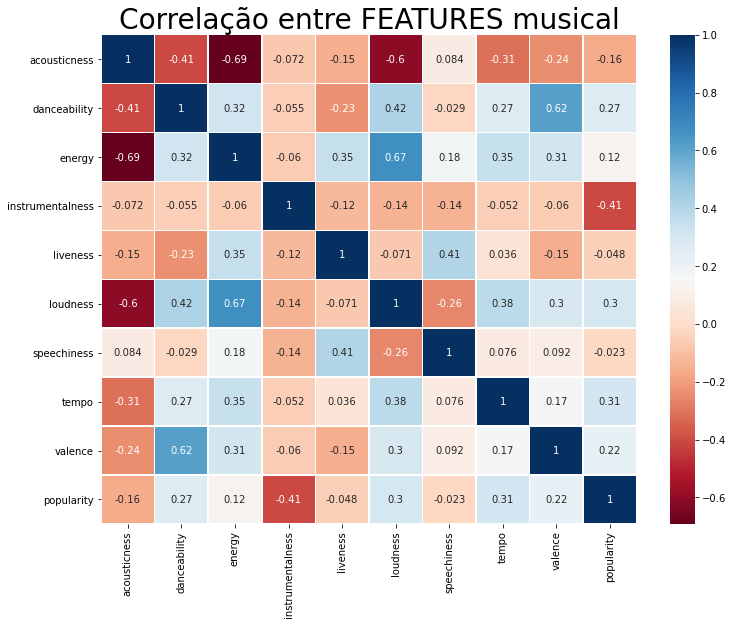

In [19]:
"""Código usado para verificar a correlação entre os atributos do DataFrame."""

plt.subplots(figsize= (12,9))

sns.heatmap(DF.corr(), annot = True, cmap = 'RdBu', linewidths = 0.5,
           linecolor = 'white');
plt.title('Correlação entre FEATURES musical', fontsize = 28)
# Salvando, criando nome, ajustando para não haver cortes e upgrade resolution
plt.savefig('mapacalor.png',bbox_inches = 'tight',dpi =600)

In [20]:
"""Este código imprime as músicas mais populares do artista segunda a API do Spotify"""

Pop = DF['popularity'].nlargest(n=5) # n indica a quantidade de faixas
Pop

name
Halo                           75
Love On Top                    74
Formation                      73
Run the World (Girls)          72
Drunk in Love (feat. Jay-Z)    70
Name: popularity, dtype: int64

###  Para haver uma melhor compreesão da análise desenvolvida, um novo DataFrame DIRECIONADO aos FEATURES das faixas será construído afim de ampliar o entendimento da popularidade das faixas.

### Para fazer algumas inferências gráficas, é necessário remover atributos que dificultam a vizualização da variação dos demais atributos.

#### Sendo assim, serão removido os atributos. 
## <font color = red> tempo, loudness e popularity. 

In [21]:
DF_2 = DF[['acousticness','danceability','energy','instrumentalness', 'liveness', 'speechiness', 'valence']]

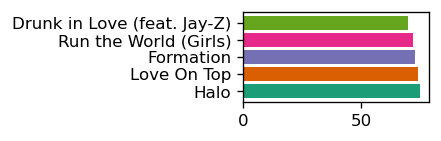

In [22]:
fig, ax = plt.subplots(figsize=(2, 1), dpi=120)
colors = plt.cm.Dark2(range(8))
x = Pop.index
width = Pop.values
ax.barh(y=x, width=width, color=colors);

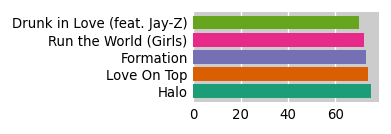

In [23]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

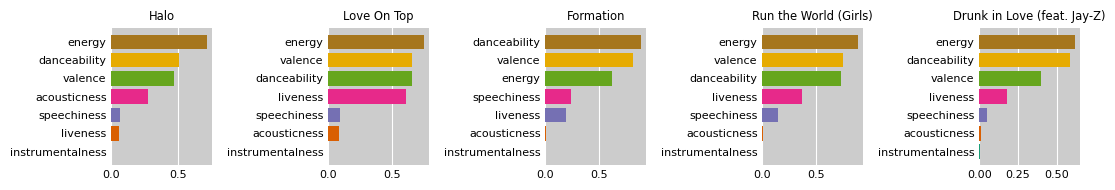

In [24]:
"""Como observado abaixo é possível ter uma ideia de quais são os atributos que torna cada faixa mais popular,
ATENÇÃO, pois as FEATURES por faixa não estão na mesma ordem para cada faixa."""

fig, ax_array = plt.subplots(nrows=1, ncols=5, figsize=(11, 2), dpi=100, tight_layout=True)
dates = ['Halo', 'Love On Top', 'Formation', 'Run the World (Girls)','Drunk in Love (feat. Jay-Z)']
for ax, date in zip(ax_array, dates):
    s = DF_2.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

### Descobri recentemente dois novos recursos gráficos (Plotly & Cufflinks) e achei bastante interessante inserir a mesma nesse projeto, que é uma biblioteca capaz de criar Dashboard dentro do Jupyter Offline. Mais detalhes pode ser encontrado na <a href="https://plotly.com/python/pandas-backend/#introduction"> Documentação</a> da biblioteca.

In [25]:
"""Recurso para fazer o download da biblioteca no sistema."""

#!pip install cufflinks
#!pip install plotly
#!pip install chart_studio - Precisa ser instalado para trabalhar online.

import cufflinks as cf
from plotly.offline import iplot
import plotly.express as px

In [26]:
cf.go_offline()

In [30]:
"""O gráfico abaixo possibilita a visualização geral de todas as faixas do artista."""

DF_2.sum().iplot(kind='bar', title='Gráfico de barras')

In [31]:
"""Uma outra opção de visualizar a correlação existente entre os dados."""

fig = px.imshow(DF_2.corr())
fig.show()

In [32]:
"""Esse gráfico mostra o quão um dado pode ou não estar contido nas features do outro."""

import plotly.express as px

fig = px.scatter(DF_2, x='acousticness', y="valence")
fig.add_hline(y=0.9)
fig.add_vrect(x0=0.9, x1=2)
fig.show()